# Animal intake data from LMAS notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import plotly.graph_objects as go
import seaborn as sns


In [2]:
df = pd.read_csv('data/animal_intake_data_2025.12.03.csv')

df.head()

,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode,ObjectId
0,INTAKE,A430999,40204,OWNER SUR,EUTH REQ,2021-01-07 00:00:00,EUTH MED,EUTH,REQUESTED,2021-01-07 00:00:00,DOG,N,N,LARGE,WHITE / TAN,BASSET HOUND,40204,1
1,FOSTER,A423884,40211,STRAY,OTC,2025-03-07 00:00:00,STRAY,FOSTER,STRAY,2025-03-12 00:00:00,DOG,N,Y,SMALL,BLACK / TAN,MIN PINSCHER / MIN PINSCHER,40213,2
2,FOSTER,A423884,40213,FOSTER,RETURN,2025-04-13 00:00:00,FOSTER RET,ADOPTION,FOSTER,2025-04-13 00:00:00,DOG,N,Y,SMALL,BLACK / TAN,MIN PINSCHER / MIN PINSCHER,40213,3
3,N47,A583388,40228,OWNER SUR,OTC,2025-05-05 00:00:00,OWNER MED,ADOPTION,WALK IN,2025-05-20 00:00:00,CAT,N,N,X-LRG,ORANGE,DOMESTIC SH,40228,4
4,FREEZER,A558504,40215,STRAY,FIELD,2022-02-21 00:00:00,DOA,DISPOSAL,NECROPSY,2022-03-09 00:00:00,DOG,N,N,MED,BLUE,AMERICAN STAFF / MIX,40218,5


## Basic EDA and cleanup

In [3]:
df.columns

Index(['kennel', 'animalid', 'jurisdiction', 'intype', 'insubtype', 'indate',
       'surreason', 'outtype', 'outsubtype', 'outdate', 'animaltype', 'sex',
       'bites', 'petsize', 'color', 'breed', 'sourcezipcode', 'ObjectId'],
      dtype='object')

ObjectId seems to just be a indexing column and is unneeded.

In [4]:
df = df.drop('ObjectId', axis=1)


In [5]:
df.dtypes

kennel           object
animalid         object
jurisdiction     object
intype           object
insubtype        object
indate           object
surreason        object
outtype          object
outsubtype       object
outdate          object
animaltype       object
sex              object
bites            object
petsize          object
color            object
breed            object
sourcezipcode    object
dtype: object

Kennel = string


AnimalID = hex number


Jurisdiction = zip code (string)


intype = string


insubtype = string


indate = date


surreason = string


outtype = string


outsubtype = string


outdate = date


animaltype = string


sex = string


bites = boolean


petsize = string


color = string


breed = string


sourcezipcode = string

In [6]:
df['indate'] = pd.to_datetime(df["indate"])
df['outdate'] = pd.to_datetime(df['outdate'])

In [7]:
df.dtypes

kennel                   object
animalid                 object
jurisdiction             object
intype                   object
insubtype                object
indate           datetime64[ns]
surreason                object
outtype                  object
outsubtype               object
outdate          datetime64[ns]
animaltype               object
sex                      object
bites                    object
petsize                  object
color                    object
breed                    object
sourcezipcode            object
dtype: object

In [8]:
duplicate_counts = df.apply(lambda x: x.duplicated(keep=False).sum())
print(duplicate_counts)

kennel           64658
animalid         23432
jurisdiction     64668
intype           64668
insubtype        64668
indate           64668
surreason        64666
outtype          64668
outsubtype       64659
outdate          64661
animaltype       64668
sex              64668
bites            64668
petsize          64668
color            64550
breed            64262
sourcezipcode    64421
dtype: int64


In [9]:
df[df.duplicated(['animalid'], keep=False)]


,kennel,animalid,jurisdiction,intype,insubtype,indate,surreason,outtype,outsubtype,outdate,animaltype,sex,bites,petsize,color,breed,sourcezipcode
1,FOSTER,A423884,40211,STRAY,OTC,2025-03-07,STRAY,FOSTER,STRAY,2025-03-12,DOG,N,Y,SMALL,BLACK / TAN,MIN PINSCHER / MIN PINSCHER,40213
2,FOSTER,A423884,40213,FOSTER,RETURN,2025-04-13,FOSTER RET,ADOPTION,FOSTER,2025-04-13,DOG,N,Y,SMALL,BLACK / TAN,MIN PINSCHER / MIN PINSCHER,40213
10,N16,A688292,40218,STRAY,FIELD,2021-01-19,STRAY,FOSTER,NaN,2021-03-21,DOG,S,N,MED,BROWN / WHITE,PIT BULL,40218
20,308,A688944,40214,STRAY,OTC,2021-02-05,STRAY,RTO,IN KENNEL,2021-02-09,DOG,S,N,LARGE,TAN / WHITE,GERM SHEPHERD / LABRADOR RETR,40214
21,N34,A689013,40212,STRAY,FIELD,2021-05-28,ABANDON,ADOPTION,INTERNET,2021-06-22,DOG,S,N,MED,GRAY,PIT BULL,40218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64651,FOSTER,A782748,40218,STRAY,OTC,2025-06-17,STRAY,FOSTER,STRAY,2025-06-22,DOG,S,N,SMALL,BRN MERLE,DACHSHUND,40291
64652,FOSTER,A782748,40218,FOSTER,RETURN,2025-08-01,STRAY,FOSTER,VACATION,2025-08-01,DOG,S,N,SMALL,BRN MERLE,DACHSHUND,40222
64653,FOSTER,A782748,40218,FOSTER,RETURN,2025-08-07,STRAY,TRANSFER,RESCUE GRP,2025-08-09,DOG,S,N,SMALL,BRN MERLE,DACHSHUND,40258
64655,N06,A768118,40299,FOSTER,RETURN,2024-11-09,FOSTER RET,ADOPTION,FACEBOOK,2024-11-09,DOG,S,N,MED,BR BRINDLE,PIT BULL,40211


The animal ID appears to be able to be duplicated when an animal is returned or found, so I don't want to discard the duplicates in this circumstance. This opens up a potential question: how many animals are returned or found repeatedly?

For the other columns, it makes sense that values are duplicated.

In [10]:
df.isnull().sum()

kennel               0
animalid             0
jurisdiction     13450
intype               0
insubtype          182
indate               0
surreason        13450
outtype          13790
outsubtype       23311
outdate          13755
animaltype           0
sex               1039
bites            13434
petsize           2453
color                1
breed               77
sourcezipcode     9591
dtype: int64

I don't want to get rid of any rows since animal id is not na for any rows.

Jurisdiction: unknown

insubtype: none

surreason: unknown

outtype: unknown

outsubtype: none

outdate: pd.NaT

sex: unknown

bites: unknown

petsize: unknown

color: unknown

breed: unknown

sourcezipcode: unknown

In [11]:
df['jurisdiction'].fillna("unknown")
df['insubtype'].fillna('none')
df['surreason'].fillna('unknown')
df['outtype'].fillna('unknown')
df['outsubtype'].fillna('none')
df['outdate'].fillna(pd.NaT)
df['sex'].fillna('unknown')
df['bites'].fillna('unknown')
df['petsize'].fillna('unknown')
df['color'].fillna('unknown')
df['breed'].fillna('unknown')
df['sourcezipcode'].fillna('unknown')

0          40204
1          40213
2          40213
3          40228
4          40218
          ...   
64663    unknown
64664      40219
64665      40229
64666      40214
64667      40205
Name: sourcezipcode, Length: 64668, dtype: object

In [12]:
df.rename(columns={
    'animalid': 'animal_id',
    'intype': 'intake_type',
    'insubtype': 'intake_subtype',
    'indate': "intake_date",
    'surreason': 'surrender_reason',
    'outtype': 'out_type',
    'outsubtype': 'out_subtype',
    'outdate': 'out_date',
    'animaltype': "animal_type",
    'petsize': 'size',
    'sourcezipcode': "source_zip_code"
}, inplace=True)

In [13]:
df = df[[
    'animal_id', 
    'source_zip_code',
    'jurisdiction', 
    'intake_date', 
    'intake_type', 
    'intake_subtype', 
    'surrender_reason',
    'out_date',
    'out_type',
    'out_subtype',
    'animal_type',
    'sex',
    'size',
    'breed',
    'color',
    'bites'
]]

df.head()

,animal_id,source_zip_code,jurisdiction,intake_date,intake_type,intake_subtype,surrender_reason,out_date,out_type,out_subtype,animal_type,sex,size,breed,color,bites
0,A430999,40204,40204,2021-01-07,OWNER SUR,EUTH REQ,EUTH MED,2021-01-07,EUTH,REQUESTED,DOG,N,LARGE,BASSET HOUND,WHITE / TAN,N
1,A423884,40213,40211,2025-03-07,STRAY,OTC,STRAY,2025-03-12,FOSTER,STRAY,DOG,N,SMALL,MIN PINSCHER / MIN PINSCHER,BLACK / TAN,Y
2,A423884,40213,40213,2025-04-13,FOSTER,RETURN,FOSTER RET,2025-04-13,ADOPTION,FOSTER,DOG,N,SMALL,MIN PINSCHER / MIN PINSCHER,BLACK / TAN,Y
3,A583388,40228,40228,2025-05-05,OWNER SUR,OTC,OWNER MED,2025-05-20,ADOPTION,WALK IN,CAT,N,X-LRG,DOMESTIC SH,ORANGE,N
4,A558504,40218,40215,2022-02-21,STRAY,FIELD,DOA,2022-03-09,DISPOSAL,NECROPSY,DOG,N,MED,AMERICAN STAFF / MIX,BLUE,N


Grouping by and aggregating data:

1. Animal type, and then breed

In [14]:
animal_type_count = df['animal_type'].value_counts()
animal_type_count

animal_type
DOG           33652
CAT           30051
RABBIT          358
OTHER           335
BIRD            182
LIVESTOCK        62
GUINEA PIG       28
Name: count, dtype: int64

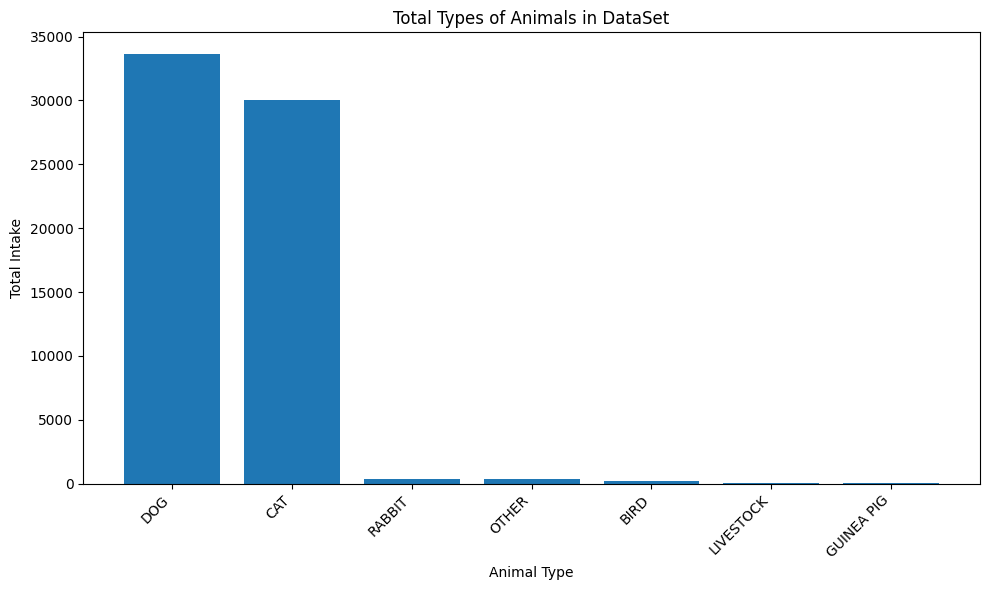

In [15]:
plt.figure(figsize=(10, 6))

color = "#2702AD"

plt.bar(animal_type_count.index, animal_type_count.values)

plt.xlabel('Animal Type')
plt.ylabel("Total Intake")
plt.title("Total Types of Animals in DataSet")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [16]:
breed_groups = df.groupby(['animal_type', 'breed']).size()
breed_groups

animal_type  breed              
BIRD         ARAUCANA / AMERICAN     1
             BANTAM                  2
             BUDGERIGAR              2
             CHICKEN                79
             COCKATIEL               3
                                    ..
RABBIT       REX                    37
             REX-MINI                3
             SATIN                   4
             TAN                     2
             THRIANTA                2
Length: 1348, dtype: int64

Dogs:

In [17]:
target_animal = 'dog'
df['animal_type'] = df['animal_type'].str.strip().str.lower()

dog_filtered_df = df[df['animal_type'] == target_animal]

dog_breed_counts = dog_filtered_df['breed'].value_counts()
dog_breed_counts



breed
PIT BULL                           5603
GERM SHEPHERD                      1714
PIT BULL / MIX                     1526
LABRADOR RETR                      1351
LABRADOR RETR / MIX                1087
                                   ... 
BASSET HOUND / GOLDEN RETR            1
FOX TERR WIRE / PARSON RUSS TER       1
PIT BULL / BLACK MOUTH CUR            1
SWED VALLHUND / MIX                   1
CHINESE SHARPEI / STAFFORDSHIRE       1
Name: count, Length: 1180, dtype: int64

In [18]:
dog_breed_counts_25 = dog_breed_counts.head(25)

There are 1180 breeds of dog, so I'm going to take the top 25 breeds and graph them.

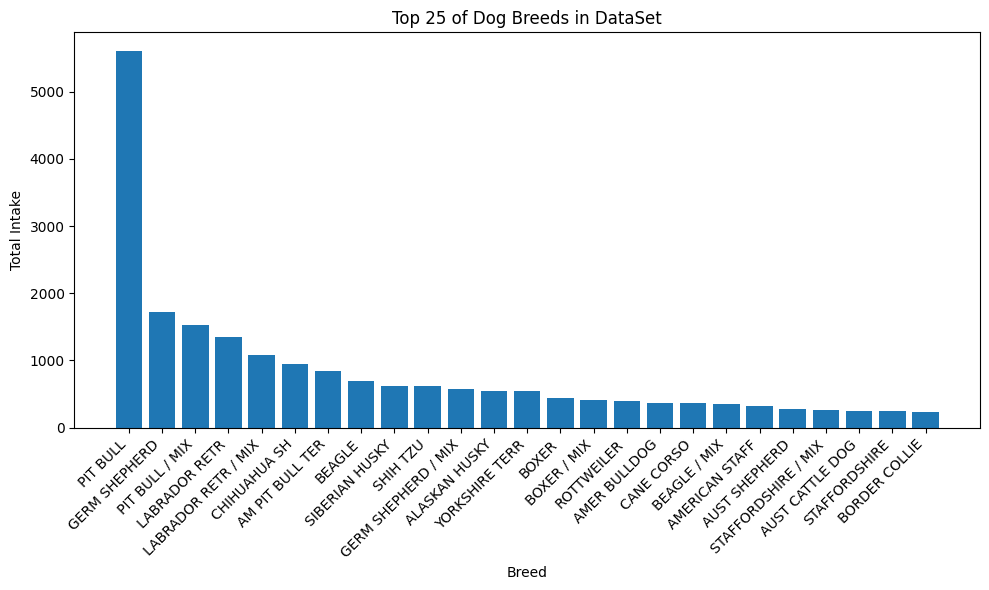

In [19]:
plt.figure(figsize=(10, 6))

color = "#2702AD"

plt.bar(dog_breed_counts_25.index, dog_breed_counts_25.values)

plt.xlabel('Breed')
plt.ylabel("Total Intake")
plt.title("Top 25 of Dog Breeds in DataSet")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Cats:

In [20]:
target_animal_cat = 'cat'
df['animal_type'] = df['animal_type'].str.strip().str.lower()

cat_filtered_df = df[df['animal_type'] == target_animal_cat]

cat_breed_counts = cat_filtered_df['breed'].value_counts()
cat_breed_counts


breed
DOMESTIC SH                  23940
DOMESTIC MH                   2273
DOMESTIC LH                   1232
AMER SH                       1168
SIAMESE                        270
                             ...  
SINGAPURA                        1
DOMESTIC MH / DOMESTIC MH        1
SIAMESE / DOMESTIC MH            1
PERSIAN / MIX                    1
ORIENTAL SH / MIX                1
Name: count, Length: 90, dtype: int64

Similar to dogs, I'm going to take the top 25:

In [21]:
cat_breed_counts_25 = cat_breed_counts.head(25)

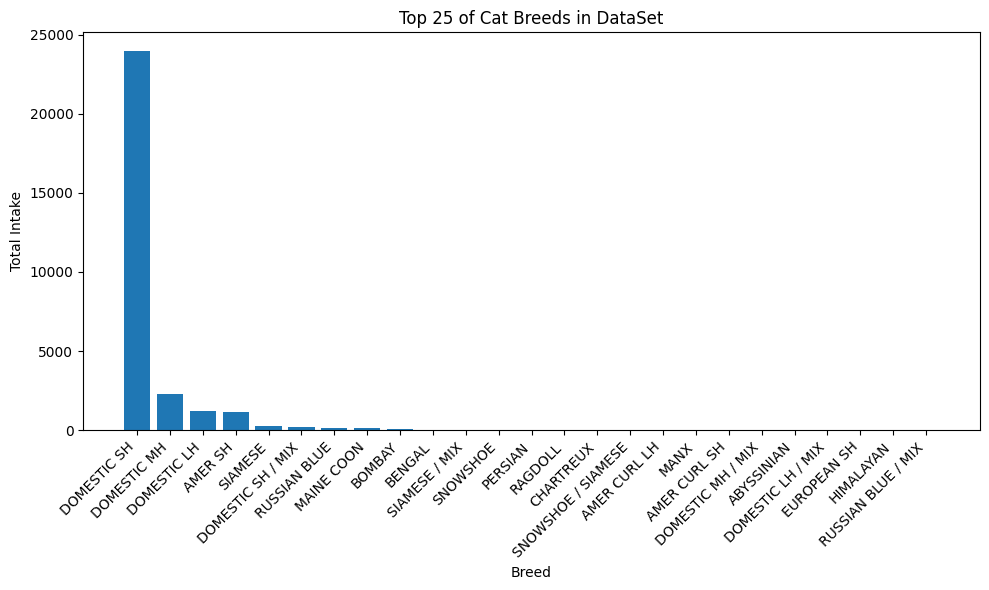

In [22]:
plt.figure(figsize=(10, 6))

color = "#2702AD"

plt.bar(cat_breed_counts_25.index, cat_breed_counts_25.values)

plt.xlabel('Breed')
plt.ylabel("Total Intake")
plt.title("Top 25 of Cat Breeds in DataSet")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

I don't think the cat one is useful- domestic shorthair can mean a lot, so maybe by color would make more sense.

In [23]:
target_animal_cat = 'cat'
df['animal_type'] = df['animal_type'].str.strip().str.lower()

cat_filtered_df = df[df['animal_type'] == target_animal_cat]

cat_color_counts = cat_filtered_df['color'].value_counts()
cat_color_counts


color
BLACK                   4726
UNKNOWN                 3302
BRN TABBY               3110
BLACK / WHITE           2541
GRAY TABBY              1644
                        ... 
BRN TABBY / APRICOT        1
BLACK / BRN TABBY          1
GRAY TIGER / GRAY          1
GRAY TABBY / SILVER        1
GRAY TABBY / APRICOT       1
Name: count, Length: 335, dtype: int64

In [24]:
cat_color_counts_25 = cat_color_counts.head(25)

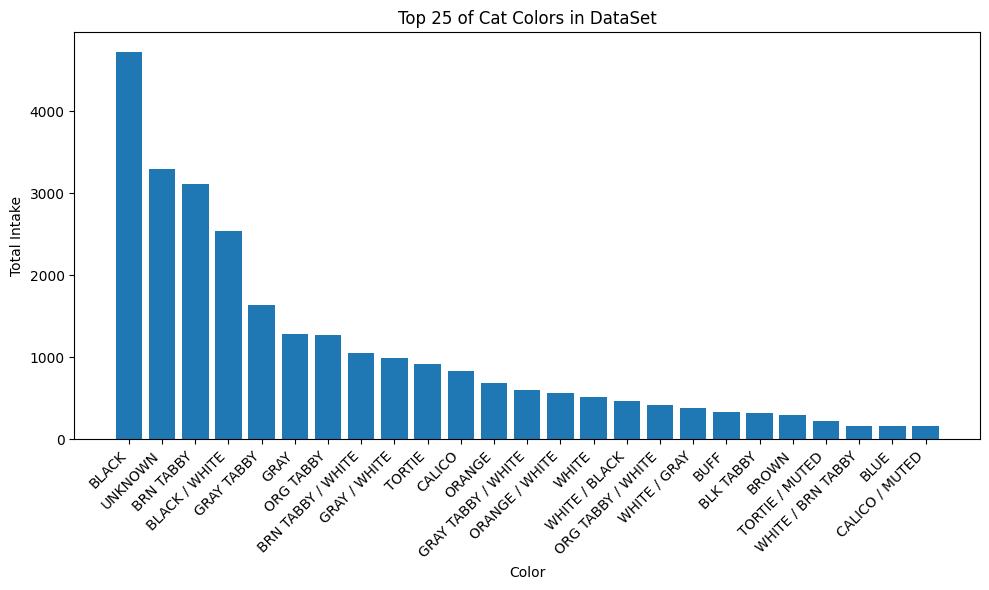

In [25]:
plt.figure(figsize=(10, 6))

color = "#2702AD"

plt.bar(cat_color_counts_25.index, cat_color_counts_25.values)

plt.xlabel('Color')
plt.ylabel("Total Intake")
plt.title("Top 25 of Cat Colors in DataSet")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Intake date comparison:

In [26]:
animal_intake_dates = df['intake_date'].value_counts()
animal_intake_dates

intake_date
2022-04-12    111
2025-06-30     99
2023-06-27     96
2025-08-07     91
2025-06-27     88
             ... 
2025-09-01      7
2021-02-16      6
2021-09-12      6
2021-02-15      5
2021-11-25      4
Name: count, Length: 1752, dtype: int64

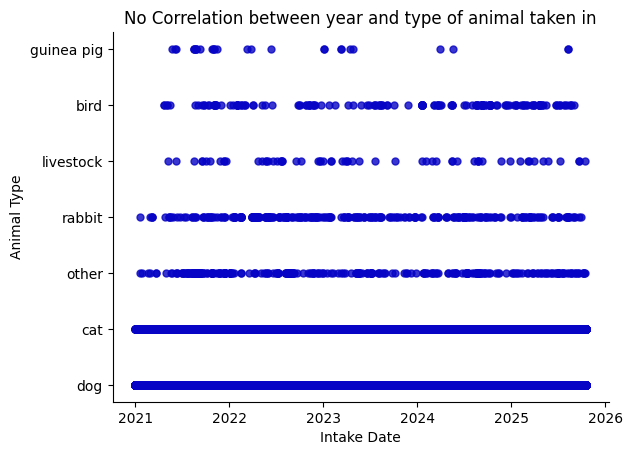

In [27]:
plt.Figure(figsize=(10,6))

plt.scatter(df['intake_date'], 
            df['animal_type'],
            color = '#0704c5',
            alpha = 0.8,
            s = 25)

plt.xlabel('Intake Date')
plt.ylabel('Animal Type')
plt.title("No Correlation between year and type of animal taken in")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Reoccurence of ID

In [28]:
animal_ids_count = df['animal_id'].value_counts(ascending=False)
animal_ids_repeated = animal_ids_count[animal_ids_count > 1]
animal_ids_repeated



animal_id
A742781    12
A699289     9
A763405     8
A728833     8
A732871     8
           ..
A705921     2
A708422     2
A723470     2
A709334     2
A774843     2
Name: count, Length: 10388, dtype: int64

In [29]:
target_value = 'A742781'
filtered_df = df[df['animal_id'] == target_value]
print(filtered_df)

      animal_id source_zip_code jurisdiction intake_date intake_type  \
37097   A742781           40205        40205  2024-02-12      RETURN   
37098   A742781           40272        40214  2023-11-30      RETURN   
37762   A742781           40165        40291  2023-08-01       STRAY   
37763   A742781           40219        40291  2023-08-29      FOSTER   
37764   A742781           40218        40218  2023-11-01      RETURN   
37765   A742781           40219        40229  2023-09-23      FOSTER   
38614   A742781           40229        40229  2024-02-09      FOSTER   
38615   A742781           40229        40205  2024-03-23      FOSTER   
38616   A742781           40291        40291  2024-04-05      RETURN   
38617   A742781           40229        40229  2024-04-30      FOSTER   
38618   A742781           40229        40229  2024-01-16      RETURN   
38619   A742781           40229        40218  2023-11-29      FOSTER   

      intake_subtype surrender_reason   out_date  out_type out_

A742781 seems to be the same animal and is repeatedly listed 12 times, with different intake and out dates. The breed, sex, size, and color match. Because of this, I don't think animal IDs are reused among different animals. This indicates to me that calculating the return rate is possible. I'd like to figure out the return rate for the year 2024.

In [30]:
def intake_over_year(year): 
    intake_year = df.groupby(df['intake_date'].dt.year)['animal_id'].value_counts()

    filtered_intake_year = intake_year.loc[int(year)]

    return filtered_intake_year

filtered_intake_year_2024 = intake_over_year(2024)

filtered_intake_year_2024


animal_id
A754031    7
A741960    6
A742781    6
A746641    6
A751249    6
          ..
A781754    1
A782330    1
A783401    1
A783556    1
A785461    1
Name: count, Length: 11563, dtype: int64

In [31]:
def filtered_intake_year_repeats(year):
    intake_year = df.groupby(df['intake_date'].dt.year)['animal_id'].value_counts()

    filtered_intake_year = intake_year.loc[int(year)]

    filtered_intake_year_repeats_count = filtered_intake_year[filtered_intake_year > 1]

    return filtered_intake_year_repeats_count

filtered_intake_year_2024_repeats = filtered_intake_year_repeats(2024)

filtered_intake_year_2024_repeats

animal_id
A754031    7
A741960    6
A742781    6
A746641    6
A751249    6
          ..
A773759    2
A774138    2
A774140    2
A774233    2
A776083    2
Name: count, Length: 2346, dtype: int64

In [32]:
def return_rate(year):
    return len(filtered_intake_year_repeats(year)) / len(intake_over_year(year)) * 100

return_rate_2024 = return_rate(2024)
return_rate_2024

20.288852373951396

The return rate for 2024 is 20.29%. I figured out the return rate by taking the amount of repeated animal IDs divided by the number of intakes total times 100. Let's see how that compares for other years and chart it.

In [33]:
return_rate_2021 = return_rate(2021)
print(return_rate_2021)

return_rate_2022 = return_rate(2022)
print(return_rate_2022)

return_rate_2023 = return_rate(2023)
print(return_rate_2023)

return_rate_2024 = return_rate(2024)
print(return_rate_2024)

return_rate_2025 = return_rate(2025)
print(return_rate_2025)

14.370418283742993
13.75997099347353
13.900033433634237
20.288852373951396
24.290834613415257


In [34]:
def get_return_rates(start, end):
    dict_of_return_rates = {}
    for year in range(start, end + 1):
            rate = return_rate(year)
            dict_of_return_rates[int(year)] = rate
    return dict_of_return_rates

return_rates_2021_2025 = get_return_rates(2021, 2025)

df_return_rates = pd.DataFrame.from_dict(return_rates_2021_2025, orient='index')
df_return_rates


,0
2021,14.370418
2022,13.759971
2023,13.900033
2024,20.288852
2025,24.290835


## Return and Adoption Rates at Louisville Metro Animal Services from 2021 - 2025

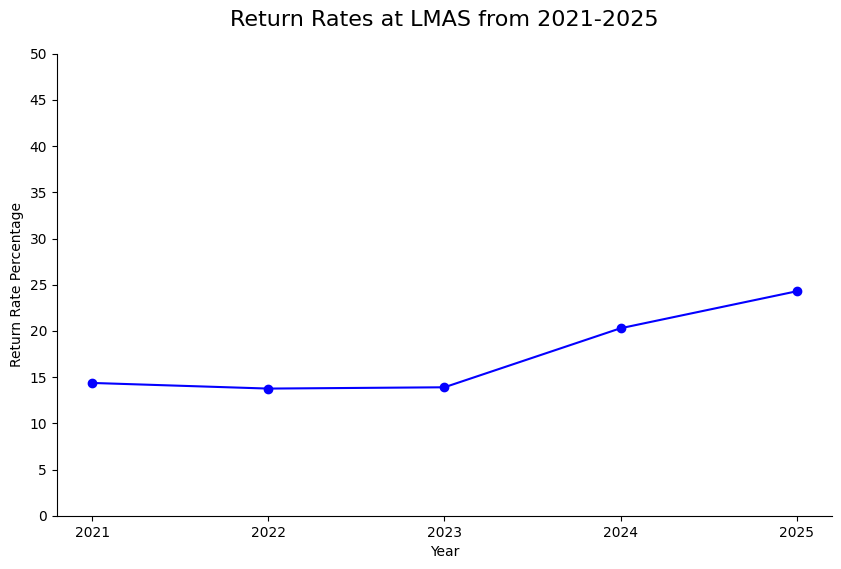

In [35]:
plt.figure(figsize=(10,6))

plt.plot(df_return_rates.index, df_return_rates.values, color="#0400ff", marker='o')


plt.xlabel("Year")
plt.ylabel("Return Rate Percentage")
plt.title("Return Rates at LMAS from 2021-2025", fontsize=16, pad=20)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=5.0))


plt.ylim(0, 50)

plt.show()

The Return Rate is an important metric, as it informs us of how successful adopting out an animal is. There have been news articles recently about the return rate increasing since the massive adoption wave in 2020. However, I don't have data prior to 2021, so I'm unsure of how true that is for the Louisville area. It is true that so far the return rate is trending upward, as demonstrated by the above graph. 


I chose a line graph for this data because it shows trends over time better, and I chose a saturated blue because Louisville Metro Government tends to use blue and yellow for their colors. I made sure to label my y-axis as a percentage, and decided to truncate it at 50% since none of the data points go above 25%. I felt that using 25% instead of 50% would produce too dramatic of a line, and that 100% had a lot of wasted space.


For the data, I did some cursory research on average return rates at animal shelters across the United States, and it seems like 15-20% is a little high but normal. Ideally most shelters want their return rate to be around 10%.

Next I'd like to figure out the rate of adoption from 2021 - 2025 and compare it to the return rate.

In [36]:
def out_types_by_year_and_type(year, out_types):
    df['out_type'] = df['out_type'].str.strip().str.lower()
    out_type_count = df.groupby(df['out_date'].dt.year)['out_type'].value_counts(ascending=False)

    filtered_out_type_by_year = out_type_count.loc[int(year)]
    filtered_out_type_by_type = filtered_out_type_by_year.loc[str(out_types)]
    filtered_out_type_by_year_sum = filtered_out_type_by_year.sum()
    return filtered_out_type_by_type, filtered_out_type_by_year_sum

out_types_by_year_and_type(2024, 'adoption')




(np.int64(3666), np.int64(11470))

In [37]:
def adoption_out_type_by_year(year):
    df['out_type'] = df['out_type'].str.strip().str.lower()
    out_types_count = df.groupby(df['out_date'].dt.year)['out_type'].value_counts(ascending=False)
    year_count = out_types_count.loc[year]
    adoption_filtered_year = year_count.loc['adoption']
    return adoption_filtered_year    

adoption_out_type_by_year(2024)

np.int64(3666)

In [38]:
def adoption_rate(year):
    total_count = df.groupby(df['out_date'].dt.year)['out_type'].value_counts()
    total_by_year = total_count.loc[year]
    total_count_by_year = total_by_year.sum()
    return adoption_out_type_by_year(year) / total_count_by_year * 100

adoption_rate(2024)

np.float64(31.961639058413247)

In [39]:
def get_adoption_rates(start, end):
    dict_of_adoption_rates = {}
    for year in range(start, end + 1):
            rate = adoption_rate(year)
            dict_of_adoption_rates[int(year)] = rate
    return dict_of_adoption_rates

adoption_rates_2021_2025 = get_adoption_rates(2021, 2025)

df_adoption_rates = pd.DataFrame.from_dict(adoption_rates_2021_2025, orient='index')
df_adoption_rates

,0
2021,31.224636
2022,28.295419
2023,26.025405
2024,31.961639
2025,30.747023


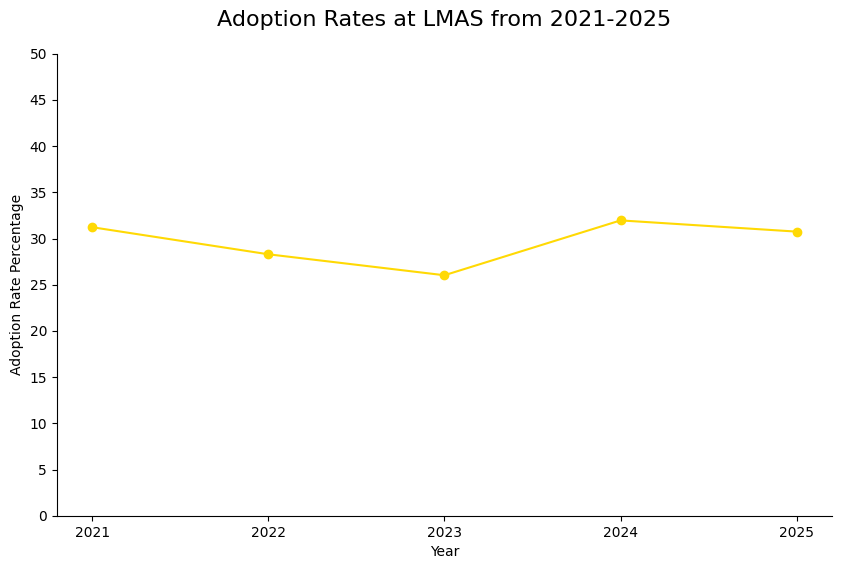

In [40]:
plt.figure(figsize=(10,6))

plt.plot(df_adoption_rates.index, df_adoption_rates.values, color="#ffd904", marker='o')


plt.xlabel("Year")
plt.ylabel("Adoption Rate Percentage")
plt.title("Adoption Rates at LMAS from 2021-2025", fontsize=16, pad=20)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=5.0))


plt.ylim(0, 50)

plt.show()

For the adoption rate, I used similar methods as I did for the return rate, using the first function as a sanity check on the math that the later function provides. I am confident I have a good calculation for this. Now, to compare the two.

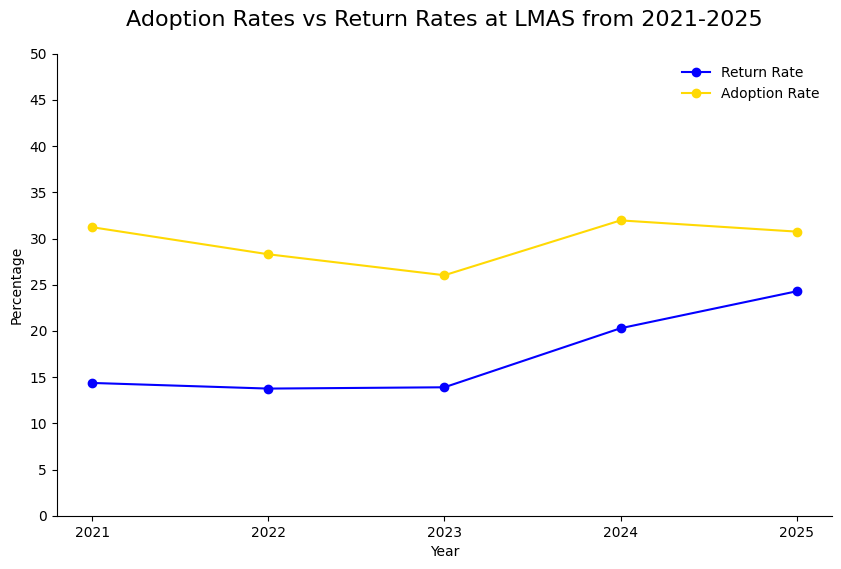

In [41]:
plt.figure(figsize=(10,6))

plt.plot(df_return_rates.index, df_return_rates.values, color="#0400ff", marker='o')
plt.plot(df_adoption_rates.index, df_adoption_rates.values, color="#ffd904", marker='o')


plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Adoption Rates vs Return Rates at LMAS from 2021-2025", fontsize=16, pad=20)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=5.0))

plt.legend(['Return Rate', 'Adoption Rate'], loc='upper right', frameon=False)


plt.ylim(0, 50)

plt.show()

The return rate has remained lower than the adoption rate, which is good! But it seems like they are headed towards meeting each other by 2025. I chose a line graph again to display this information as it shows trends over time best, but kept it at the same scale as the original graph. I added a legend to make it clear which line is which.

Both return rate and adoption rate are important metrics, as they show the animal's movement to and from the shelter.

## Return Reasons

I'd like to know why animals are being returned. There is a surrender reason column and an intake type column that I can use to find out.

In [111]:
surrender_reason_counts = df.groupby(df['animal_id'])[['surrender_reason', 'intake_type', 'intake_subtype']].value_counts()

df_surrender_reason_counts = df.join(surrender_reason_counts.rename('animal_counts'), on=['animal_id', 'surrender_reason', 'intake_type', 'intake_subtype'])

df_surrender_reason_returns = df_surrender_reason_counts[df_surrender_reason_counts['animal_id'].duplicated(keep=False)]

df_surrender_reasons_returns_drop_animal_counts = df_surrender_reason_returns.drop('animal_counts', axis=1)

df_surrender_reasons_only_returns = df_surrender_reasons_returns_drop_animal_counts.groupby(df_surrender_reasons_returns_drop_animal_counts['surrender_reason'])[['intake_type', 'intake_subtype']].value_counts()

df_surrender_reasons_only_returns_counts = df_surrender_reason_returns.join(df_surrender_reasons_only_returns.rename('intake_reason_counts'), on=['surrender_reason', 'intake_type', 'intake_subtype'])

df_surrender_reasons_only_returns_counts_no_nulls = df_surrender_reasons_only_returns_counts.dropna()

df_final_surrender_reasons_counts = df_surrender_reasons_only_returns_counts_no_nulls.groupby(df_surrender_reasons_only_returns_counts_no_nulls['surrender_reason'])[['intake_type', 'intake_subtype', 'intake_reason_counts']].value_counts().reset_index()

In [112]:
import plotly.express as px


fig = px.sunburst(
    df_final_surrender_reasons_counts,
    path=['surrender_reason', 'intake_type', 'intake_subtype'],
    values='intake_reason_counts',
    color='surrender_reason',
    title='Return Reasons at Louisville Metro Animal Services',
    width= 1000,
    height=1000
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    uniformtext=dict(minsize=10)
)

fig.show()


There are three categories of reasons, and a lot of them. I decided a Sunburst chart would be best after doing some experimentation between it and a Sankey chart. It's not fully readable at a glance, but you can hover over fields to get additional information in a tooltip. I decided to leave the color scheme as default as there really are a lot of values and I don't think I could create anything more friendly. The Sunburst chart definitely demonstrates that stray is the top reason for an animal being taken in. I do question how each type is chosen as "stray" from "surrender_reason" appears in "intake_type," so perhaps whoever is doing the data entry isn't clear on what column means what.

Some other notes:

OTC commonly means "Over the Counter," meaning the animal was brought to the shelter by a community member rather than picked up by animal control.

Field means the animal was picked up by animal control.

## Intake According to the Season

Next I would like to figure out how intake compares to the seasons of the year. For this, I will use Dec-Feb as Winter, Mar-May as Spring, Jun-Aug as Summer, and Sept-Nov as Fall.

In [44]:
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}

df['season'] = df['intake_date'].dt.month.map(month_to_season)

df['month_num'] = df['intake_date'].dt.month

df['intake_year'] = df['intake_date'].dt.year

df_by_month = df.sort_values('month_num').drop(columns=['month_num'])

season_counts = df.groupby(df['season'])['intake_year'].value_counts()

df_season_counts = df.join(season_counts.rename('season_counts'), on=['season', 'intake_year'])

df_season_counts_pivot = df_season_counts.pivot_table(index='season', columns='intake_year', values='season_counts')



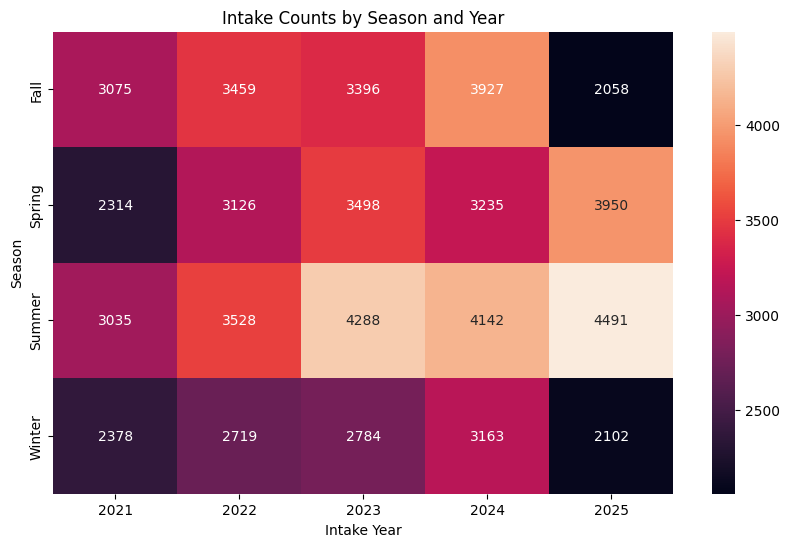

In [45]:
plt.figure(figsize=(10,6))

sns.heatmap(df_season_counts_pivot, cmap='rocket', annot=True, fmt='.0f')
plt.title('Intake Counts by Season and Year')
plt.xlabel('Intake Year')
plt.ylabel('Season')



plt.show()

Summer seems to be the winner, at least in 2023-2025, for most animal intakes. The heatmap is a good way of displaying this information at a glance, and I chose Seaborn's "rocket" color scheme because it was easier for my eyes to detect the patterns. I decided that the colors were varied enough that I didn't need space between the boxes.

Knowing the time of year that there are more intakes helps to make sure there are appropriate staffing levels to handle the influx. It also helps to develop a few theories. For example, maybe summer intake levels are higher because people are more likely to leave their pet unattended in a backyard and the pet escapes? This could inform strategies with the public for keeping their animals safe and at home.

## Other ideas for charting in the future:

Black cats/Friday the 13th

Policy changes that influenced the rate of pickups/adoptions happened

Impact on spay/neuter programs

Holidays

Which breed is returned more/adopted
